## Francisco Ricardo Torres Arvizu

## Ejercicio 1

Se utilizan las funciones que se programaron en la clase pasada 

In [2]:
function indice(A,i,j)
  if j>size(A,2) || i>size(A,2)
     println("incongruencia"
        )
        else 
       
        k=size(A,2)*(i-1)+j
        end 
     return k
end 

indice (generic function with 1 method)

In [3]:
function index_1(A,k)
    ij=[]
    if k > length(A)
  println("incongruencia"
        )
        else 
        
         for i in 1:size(A,1)
        ii=i
        for j in 1:size(A,2)
    g=size(A,2)*(ii-1)+j
            if g==k
                push!(ij,ii)
                push!(ij,j)
               
            end
            
        end
    end
    end
    return ij  
end

index_1 (generic function with 1 method)

In [4]:
d1= [0, 70.7107, 100., 70.7107, 0]

5-element Array{Float64,1}:
   0.0   
  70.7107
 100.0   
  70.7107
   0.0   

Se genera una Matriz con las condiciones de frontera 

In [5]:
function frontera(der,izq,sup,inf)
    m=length(inf)
    n=length(der)
    A=zeros(length(der),length(inf))
    for i in 2:length(der)-1
    A[i,m]=der[i]

    end  
    for j in 2:length(izq)-1
    A[j,1]=izq[j]
       
    end
    for k in 1:length(inf)
        A[n,k]=inf[k]
    end
    for l in 1:length(sup)
        A[1,l]=sup[l]
    end
    return A
end

frontera (generic function with 1 method)

In [6]:
frontera(d1,zeros(1,5),zeros(1,7),zeros(1,7))

5×7 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0   
 0.0  0.0  0.0  0.0  0.0  0.0   70.7107
 0.0  0.0  0.0  0.0  0.0  0.0  100.0   
 0.0  0.0  0.0  0.0  0.0  0.0   70.7107
 0.0  0.0  0.0  0.0  0.0  0.0    0.0   

Se programa una funcion que nos haga el $\vec{b}$

In [7]:
function construyeb(A)
    n=size(A,1)
    m=size(A,2)
    D=zeros(n-2,m-2)
    b=zeros((n-2)*(m-2))
    for i in 2:(size(A,1)-1)
        ii=i
        for j in 2:(size(A,2)-1)
            jj=j
           if  ii-1==1 && jj-1==1 #aristasuperiorizquierda
                    m1=indice(D,1,1)
                    b[m1]=A[2,1]+A[1,2]
           elseif ii+1==n && jj-1==1 #aristainferiorizquierda
                     m1=indice(D,n-2,1)
                b[m1]=A[n-1,1]+A[n,2]

            elseif ii-1==1 && jj+1==m #arista superior derecha
                    m1=indice(D,1,m-2)
                    b[m1]=A[2,m]+A[1,m-1]
                 
            elseif  ii+1==n && jj+1==m #arista inferior derecha
                m1=indice(D,n-2,m-2)
                  b[m1]=A[n-1,m]+A[n,m-1]
                
            elseif jj-1==1 && ii-1!=1 && ii+1!=n#ladoizquierdo
                m1=indice(D,ii-1,1)
                b[m1]=A[ii,1]  
                
            elseif jj+1==m && ii-1!=1 && ii+1!=n#lado derecho
                     m1=indice(D,ii-1,m-2)
                b[m1]=A[ii,m]
                 
            elseif  ii-1==1 && jj+1<m && jj-1>1 #lado superior
                m1=indice(D,1,jj-1)
                 b[m1]=A[1,jj]
              
            elseif ii+1==n && jj+1!=m && jj-1!=1   #lado inferior
               m1=indice(D,n-2,jj-1)
                b[m1]=A[n,jj]
        end
           
        end
    end
    return b
end

construyeb (generic function with 1 method)

## Vector $\vec{b}$

In [8]:
construyeb(frontera(d1,zeros(1,5),zeros(1,7),zeros(1,7)))

15-element Array{Float64,1}:
   0.0   
   0.0   
   0.0   
   0.0   
  70.7107
   0.0   
   0.0   
   0.0   
   0.0   
 100.0   
   0.0   
   0.0   
   0.0   
   0.0   
  70.7107

Se programa una funciòn que nos haga la matri, este solo require las dimensiones de ésta.

In [9]:
function crearmatriz(n,m)
   
    p=n*m
    D=zeros(n,m)
    D1=zeros(p,p)
    
  for i in 1:n
        ii=i
        for j in 1:m
            jj=j
         if jj+1<=m && ii+1<=n && ii-1!=0 && jj-1!=0 ## puntos del interior
                 m1=indice(D,ii,jj)
                 mj=indice(D,ii,jj+1)
                mi=indice(D,ii+1,jj)
                m_i=indice(D,ii-1,jj)
                m_j=indice(D,ii,jj-1)
                
                  D1[m1,m1]=-4
                  D1[m1,m_i]=1
                  D1[m1,mi]=1
                  D1[m1,m_j]=1
                  D1[m1,mj]=1
        
            elseif jj+1<=m && ii+1<=n && ii-1==0 && jj-1==0 #aristasuperiorizquierda
                    m1=indice(D,ii,jj)
                    mj=indice(D,ii,jj+1)
                   mi=indice(D,ii+1,jj)
                    D1[m1,mi]=1
                    D1[m1,m1]=-4
                    D1[m1,mj]=1
        
           elseif jj+1<=m && ii+1>n && ii-1!=0 && jj-1==0 #aristainferiorizquierda
            
                     m1=indice(D,ii,jj)
                    mj=indice(D,ii,jj+1)
                    m_i=indice(D,ii-1,jj)
                     D1[m1,m1]=-4
                     D1[m1,mj]=1
                     D1[m1,m_i]=1
                
            elseif jj+1>m && ii+1<=n && ii-1==0 && jj-1!=0 #arista superior derecha
                    m1=indice(D,ii,jj)
                    m_j=indice(D,ii,jj-1)
                    mi=indice(D,ii+1,jj)
                    D1[m1,m1]=-4
                    D1[m1,m_j]=1
                    D1[m1,mi]=1
                
            elseif  jj+1>m && ii+1>n && ii-1!=0 && jj-1!=0 #arista inferior derecha
                m1=indice(D,ii,jj)
                m_i=indice(D,ii-1,jj)
                m_j=indice(D,ii,jj-1)
                
                  D1[m1,m1]=-4
                  D1[m1,m_i]=1
                  D1[m1,m_j]=1                

                
            elseif jj+1<=m && ii+1<=n && ii-1!=0 && jj-1==0 #ladoizquierdo
                     m1=indice(D,ii,jj)
                 mj=indice(D,ii,jj+1)
                mi=indice(D,ii+1,jj)
                m_i=indice(D,ii-1,jj)
                  D1[m1,m1]=-4
                  D1[m1,m_i]=1
                  D1[m1,mi]=1
                  D1[m1,mj]=1
                
            elseif jj+1>m && ii+1<=n && ii-1!=0 && jj-1!=0 #lado derecho
                     m1=indice(D,ii,jj)
                mi=indice(D,ii+1,jj)
                m_i=indice(D,ii-1,jj)
                m_j=indice(D,ii,jj-1)
                  D1[m1,m1]=-4
                  D1[m1,m_i]=1
                  D1[m1,mi]=1
                  D1[m1,m_j]=1
                
            elseif jj+1<=m && ii+1<=n && ii-1==0 && jj-1!=0 #lado superior
                     m1=indice(D,ii,jj)
                 mj=indice(D,ii,jj+1)
                mi=indice(D,ii+1,jj)
                m_j=indice(D,ii,jj-1)
                
                  D1[m1,m1]=-4
                  D1[m1,mi]=1
                  D1[m1,m_j]=1
                  D1[m1,mj]=1
                        
            elseif jj+1<=m && ii+1>n && ii-1!=0 && jj-1!=0    #lado inferior
               m1=indice(D,ii,jj)
                 mj=indice(D,ii,jj+1)
                m_i=indice(D,ii-1,jj)
                m_j=indice(D,ii,jj-1)
                
                  D1[m1,m1]=-4
                  D1[m1,m_i]=1
                  D1[m1,m_j]=1
                  D1[m1,mj]=1
        end
     end
  end
                
    return D1
end

crearmatriz (generic function with 1 method)

## Matriz 

In [10]:
crearmatriz(3,5)

15×15 Array{Float64,2}:
 -4.0   1.0   0.0   0.0   0.0   1.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -4.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -4.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -4.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -4.0   0.0      1.0   0.0   0.0   0.0   0.0   0.0
  1.0   0.0   0.0   0.0   0.0  -4.0  …   0.0   1.0   0.0   0.0   0.0   0.0
  0.0   1.0   0.0   0.0   0.0   1.0      0.0   0.0   1.0   0.0   0.0   0.0
  0.0   0.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   1.0   0.0   0.0
  0.0   0.0   0.0   1.0   0.0   0.0      1.0   0.0   0.0   0.0   1.0   0.0
  0.0   0.0   0.0   0.0   1.0   0.0     -4.0   0.0   0.0   0.0   0.0   1.0
  0.0   0.0   0.0   0.0   0.0   1.0  …   0.0  -4.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   1.0  -4.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   1.0  -4.0   1.0   0.0
 

Función que mapea las entradas de un arreglo a una matriz

In [12]:
function mapmatrz(a,n,m)
    G=zeros(n,m)
    for i in 1:length(a)
        k=index_1(G,i)[1]
        l=index_1(G,i)[2]
        h=a[i]
        G[k,l]=h
        
    end
    return G
end

mapmatrz (generic function with 1 method)

Matriz on los puntos interiores calculados por el mètodo de diferencias finitas.

In [13]:
mapmatrz((crearmatriz(3,5)^-1)*(construyeb(frontera(d1,zeros(1,5),zeros(1,7),zeros(1,7)))),3,5)

3×5 Array{Float64,2}:
 -1.30459  -3.37339   -7.41827  -15.8087  -33.4596
 -1.84497  -4.77069  -10.491    -22.3568  -47.319 
 -1.30459  -3.37339   -7.41827  -15.8087  -33.4596

## Gráfica

In [14]:
using PyPlot

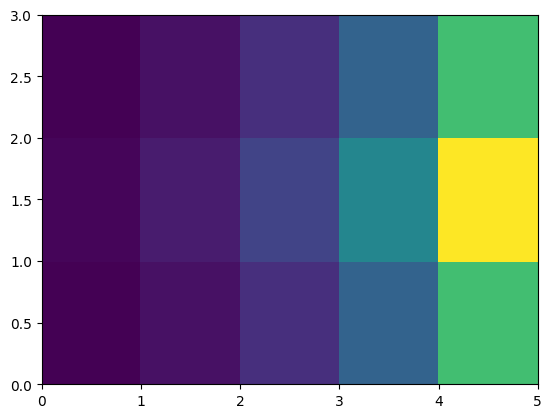

PyObject <matplotlib.collections.QuadMesh object at 0x7f5f202fb8d0>

In [18]:
pcolormesh(mapmatrz(-1*(crearmatriz(3,5)^-1)*(construyeb(frontera(d1,zeros(1,5),zeros(1,7),zeros(1,7)))),3,5))